<a href="https://colab.research.google.com/github/vcu-swim-lab/digital-forensics-data-science-tutorials/blob/main/Image_Analysis_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:saddlebrown;"><center>Image Analysis: Analyzing A Set of Shoe Prints For Digital Forensics Using Data Science</center></h1>


<br>
<h2 style="color:peru;"><center><u>[Background Information]</u></center></h2>

<p><center>Digital Forensics is a science that focuses on identifying, gathering, processing, analysing, and 
reporting of data stored electronically. <blockquote style="color:burlywood;">Computer emails, text messages, images, documents, and internet histories 
are all viable for digital forensic analysis.</blockquote>
 
An analyst will have to examine data from a user or suspect and try and preserve the 
evidence in its most original form. <blockquote style="color:burlywood;">Any alarming piece of information from these computer files can be used 
as evidence. </blockquote>

Usually, the unfiltered data will be received in bulk with a lot harmless filler, resulting in a tasking file size. As a result, to comb the data manually would be grueling and time consuming. This is where the utilization of data science and machine learning comes into play. Chat logs and Images are a great example of this, and one of the most common evidence formats you will come across. <blockquote style="color:burlywood;"> You may have to read through 
their messages to see their conversation, who their communicating with, potential partners, or other key 
pieces of evidence like large scale images. Images can be a key piece to the criminal profile puzzle.</blockquote> </center></p>

<h2 style="color:darkolivegreen;"><center><u>[Accessing the Image Datasets]</u></center></h2>

<p><center>The image dataset we will be looking at is a series of outsole prints given to us by Iowa State University all rights reserved to the original authors: <a href="https://iastate.figshare.com/articles/figure/2D_Footwear_outsole_impressions/11624073/1">[Image Dataset from Iowa State Link]</a> </center></p>
<blockquote style="color:darkkhaki";>More details on this dataset can be found on the site. Some of those details being; a readme file, and a csv file with background and information on the sole prints.</blockquote>

<p><center>In our case, we will be using these outsole prints as example data to showcase some time saving image processing techniques. These techniques will allow us to; clean and condense large datasets of images to a more manageable size, categorize them by certain attributes and features, and minimize the scope for manual analysis.</center></p>

<p><center>We hope by learning and applying these methods that digital forensic investigator's and future ones like YOU will be able to complete their tasks in a fast and efficent manner.</center></p> in like our modern day and age to find the culprit responsible given a vast amount of evidence like dealing with a wide array of images.

<h4 style="color:darkolivegreen;"><center><u>Why is this important?</u></center></h4>

<p><center>Digital Forensics is a very important branch in forensic science. It's everywhere in your favorite crime scene shows, like that one character working in the lab that could range from fingerprints, thumbprints or in our case outsole footprints.</center></p>

<p><center>The lab analyst could have multiple images piling on in a case, there could be hundreds or thousands of images to pull through and sort. So we can use the secrets of data science to process our images.</center></p>


<p><center> The internet world is changing with more advances in AI that come some unexpected consequences like dealing with image authentication nowadays.

<h2 style="color:darkcyan;"><center><u>[Learning Goals]</u></center></h2>


<ul style="text-align:center;list-style-position:inside">
    <li>Understand the importance of data science techniques and tools</li>
    <li>Be able to many images on google collab</li>
    <li>Utilize various image processing libraries like cv2, PIL</li>
    <li>Understand and apply image processing algorithms to manipulate images</li>
    <li>Detect images of any digital forgery canny algorithm you can easily see the edges and detect from each image</li>
</ul>

<h2 style="color:mediumblue;"><center><u>[Getting started with some libraries]</u></center></h2>

<blockquote style="color:cadetblue";>
This section goes over some libraries that we will be importing in this notebook and will make some of the dataset processing a lot easier. <b>numpy, cv2, PIL, matplotlib</b>
</blockquote>

<dl style="text-align:center;list-style-position:inside">
    <dt><a href="https://www.numpy.org/">[Numpy]</a></dt>
<dd style="color:cadetblue;">is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.</dd>  
<dt><a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html">[CV2]</a></dt>
<dd style="color:cadetblue;">is a library for computer vision tasks and helps with our many image processing techniques.</dd>
<dt><a href="https://pillow.readthedocs.io/en/stable/handbook/overview.html">[PIL]</a></dt> <dd style="color:cadetblue;">library for adding more image processing capabilities of an image.</dd>
<dt><a href="https://matplotlib.org/">[Matplotlib]</a></dt>
<dd style="color:cadetblue;">is a library which generates figures and provides graphical user interface toolkit.</dd>
</dl>


In [ ]:
#importing our libraries and modules for image processing 
from google.colab import files # Helps with being able to upload our images to the file directory



from IPython.display import Image # Useful for resizing and reformatting our images in the processing step
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # only able to use this in google collab to show otherwise the image will crash at runtime
import PIL

#Need to mount our google drive with the folder you downloaded from github Part1jpg
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<h2 style="color:darkcyan;"><center><u>[Prepping our Image Dataset]</u></center></h2>






<p><center>In order to prep our dataset we need to grab one of those big zip files in our dataset and the one that we will be focusing on is Part1.zip that lists sole images from shoe footprints of 7 participants 1-7 that include a vast orientation of footwear that they have submitted with various left and right footwear prints and multiple shoes they uploaded that are all in tiff image format which makes image processing hard to do because of how large tiffs are and google collab can support a limited amount of file size images at runtime.   </center></p>

<p><center>
To combat this issue and keep a good quality image format for google collab google collab able to easily support is by converting Part1zip to jpgs which has been  in our  team's github known as Part1jpg and these will be the images that we will be referencing throughout the collab notebook


<a href="https://github.com/vcu-swim-lab/digital-forensics-data-science-tutorials/tree/main/Images%20Dataset/Part1jpg">[Part1jpg]</a> </center></p>



</center></p>



<h3 style="color:peru;"><center><u>> Option 1 - Recommended</u></center></h3>
<p><center>The most optimal way , which allows for a one time load in, is having the folder mounted on google drive and allows you to execute through those image file paths via google drive using our Part1jpg folder like listed below in uploading one of our images.

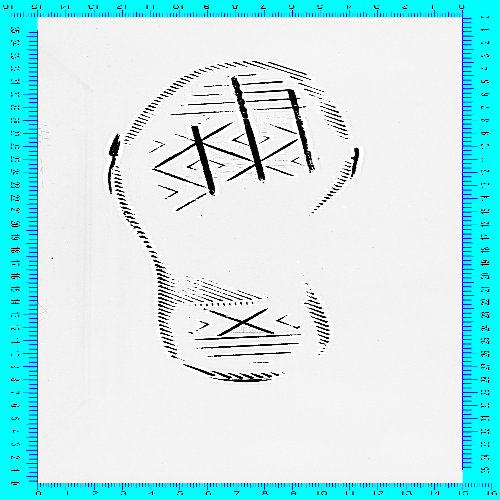

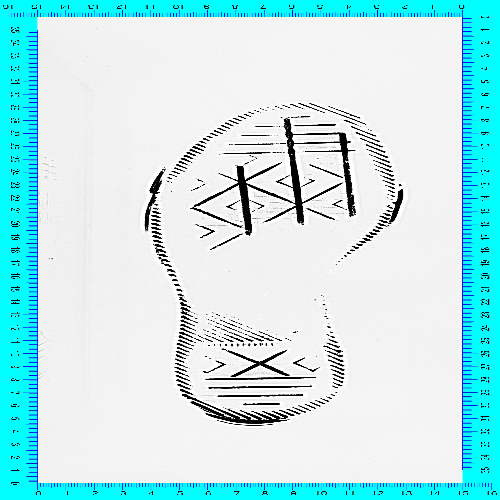

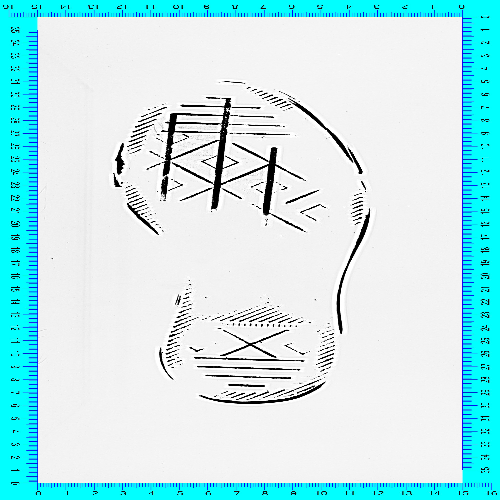

In [ ]:
# Load the image from Google Drive



from google.colab import files

from skimage import io
# Upload multiple image url files stord in our google drive
urls = ["/content/drive/MyDrive/Part1jpg/001_01_L_01.jpg",
       "/content/drive/MyDrive/Part1jpg/001_01_L_02.jpg",
      "/content/drive/MyDrive/Part1jpg/001_01_R_02.jpg"]  

for url in urls:
  image = io.imread(url) 
  
  # Need to resize the image to fit the frame of our screen
  resizedImgs = cv2.resize(image, (500, 500)) 
  cv2_imshow(resizedImgs)
  print('\n')







Tada! Just like that we were able to upload 3 images into google collab from our dataset using our url links from google drive.

<h3 style="color:peru;"><center><u>> Option 2</u></center></h3>

<p><center>Another way is to directly upload a singular image in each browser session via Part1jpg but is not stored in google drive.

<blockquote style="color:burlywood;">You will have to do this upload widget every time (uploaded = files.upload() for every singular image</blockquote></center></p>

<p><center>Then you can use the following code to load the image into collab and directly call Image through Ipython Display module like we did for the two cell blocks below

In [ ]:
# Code Block to upload a image using the upload_image method
uploaded = files.upload()







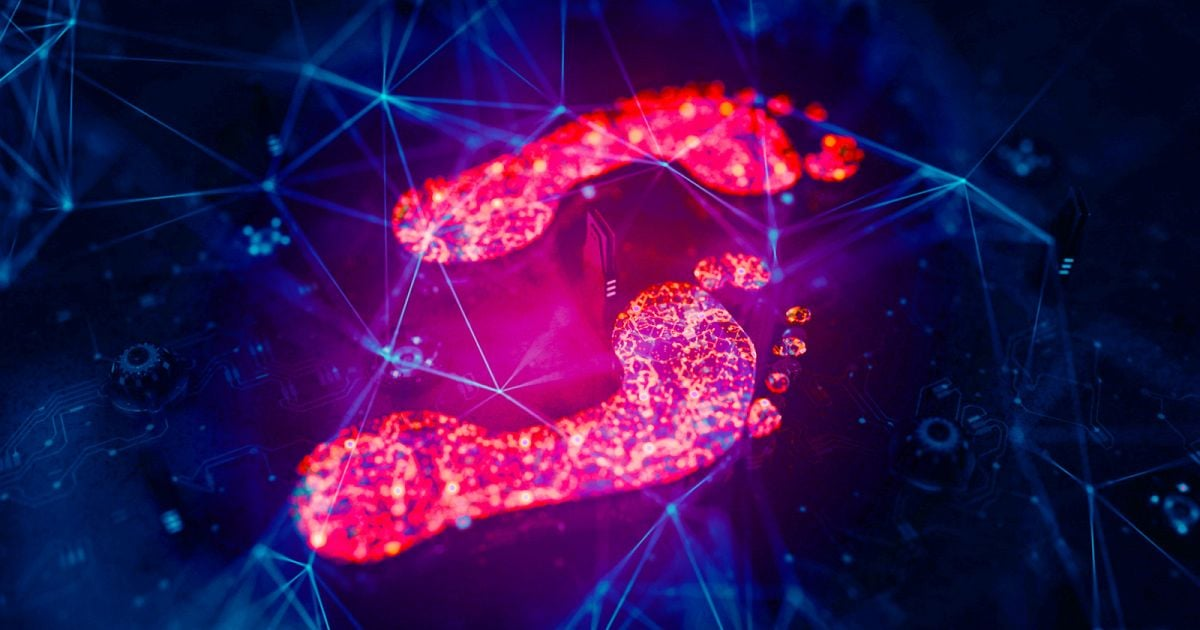

In [ ]:
Image('footprint-tracking-cybersecurity-digital-footprint.jpg' , height = 700 , width = 2000)

<h2 style="color:darkolivegreen;"><center><u>[Chapter 2: What is an Image and how to preprocess them!]</u></center></h2>

<p><center>Gathering images is a important task in data forensics and what we can gain from these images is up to us to interpret any patterns, identify any correlation and give us a snap shot view of a case. In this scenario we have identified a footprint which pops up a bunch of questions like what can we use to analyze to the identiy of the indvidual to start off we can ask what is this individual's shoe size, is there any id we can observe, any way we can tell the gender of the individual and if there are any other pictures is there any correlation. Digital forensic investigators must be wary about this as it can solve many future cases there with patterns as identifying if the same footprint belongs to someone and how we can use this in a crime scence case of a series of murders.https://ksltv.com/416930/digital-footprint-led-police-to-suspect-in-lueck-murder/

We can see in this image of our trial run and opening up a file in collab that this belongs 001_001_01 jpg image of a women with a size of 5.5

In [ ]:
from google.colab import files
from IPython.display import Image, display




image = cv2.imread("/content/drive/MyDrive/Part1jpg/001_01_L_01.jpg")



#uploaded = files.upload()



In [ ]:
Image('001_01_L_01.jpg' , width = 500 , height = 400)
Image('001_01_L_02.jpg', width = 500, height = 400)

<h4 style="color:darkolivegreen;"><center>[Countour Challenge Algorithm]</center></h4> 

<p><center>Countour detection is one of the forefronts for early image processing. Contours help in that it can be explained as a curve joining all continous paths along a boundary these contours can be useful for shape analysis and object detection. For better accuracy with utilizing contours we can go back to our friend the canny edge detection algorithm that already does a lot of for the preprocessing phase for contours with simplifying the edges and creating a binary image.
The openCV method findContours() can be used to now find the contours within our image 
</center></p>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# Lets use our canny algorithm image that was utilizing the footprint 001_01_L_01.jpg


imgray = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

<h2 style="color:darkolivegreen;"><center><u>[Chapter 3: Image Processing Techniques and their Importance ]</u></center></h2>

Image processing techniques are at the forefront of analyzing and conducting images in the most efficent way. 

These image techniques are home to determing all of an Images characteristics explained with code and their descriptions + philosphy behind each algorithm that we will discuss.

These are algorithms that we will keep coming back to whenever we want to see any distinctions in images like edges, features, clustering of points and more that makes a Digital Foresic Investigators life easier.

<h3 style="color:darkolivegreen;"><center>[Canny Algorithm Denoising and Processing Images by edge detection]</center></h4>

<p><center>The canny algorithm a famous algorithm by John F Canny from 1986 meant to sketch the edges of a object present in a picture.</center></p> 

<blockquote style="color:cadetblue";> The Canny algorithm is a multi process algorithm and the steps below are essential to sucessfully process the image with the canny algorithm denoted by the picture below and its code snippet.</blockquote>
<ol style="textalign:center; list-style-position:inside";>
<li> Noise reduction by applying a gaussian filter that smooths an image</li>
<li> Gradient calculation</li>
<li>Non-maximum suppression which basically is a edge thinning technique to find the largest edge </li>
<li> **Double threshold this is where we supply our two thresholds this is what determines our image by our code**</li>
<li>Edge Tracking by Hysteresis this finalizes the detection of edges by supressing all the edges are weak or not connected to strong edges using our minVal and maxVal values</li>
</ol>

<p><center>Looking at our code snippet, we imported our libraries. The perk of downloading CV2, is  that it has the canny algorithm built in, so we can iterate through the image based on its number of features. We first need to read and resize our image with libraries.</center></p>
<blockquote style="color:cadetblue";>The canny function has 3 arguments which our first argument is our resized image to fit the scale in matplotlib, 2nd argument is our minVal of our features then our maxVal in arguments




<blockquote style="color:cadetblue";>
Lets use the subplot function to put our Canny Image side by side with our original and new Canny image to compare!

<blockquote style="color:cadetblue";>

(Text(0.5, 1.0, 'Canny Edge Image'), ([], []), ([], []))

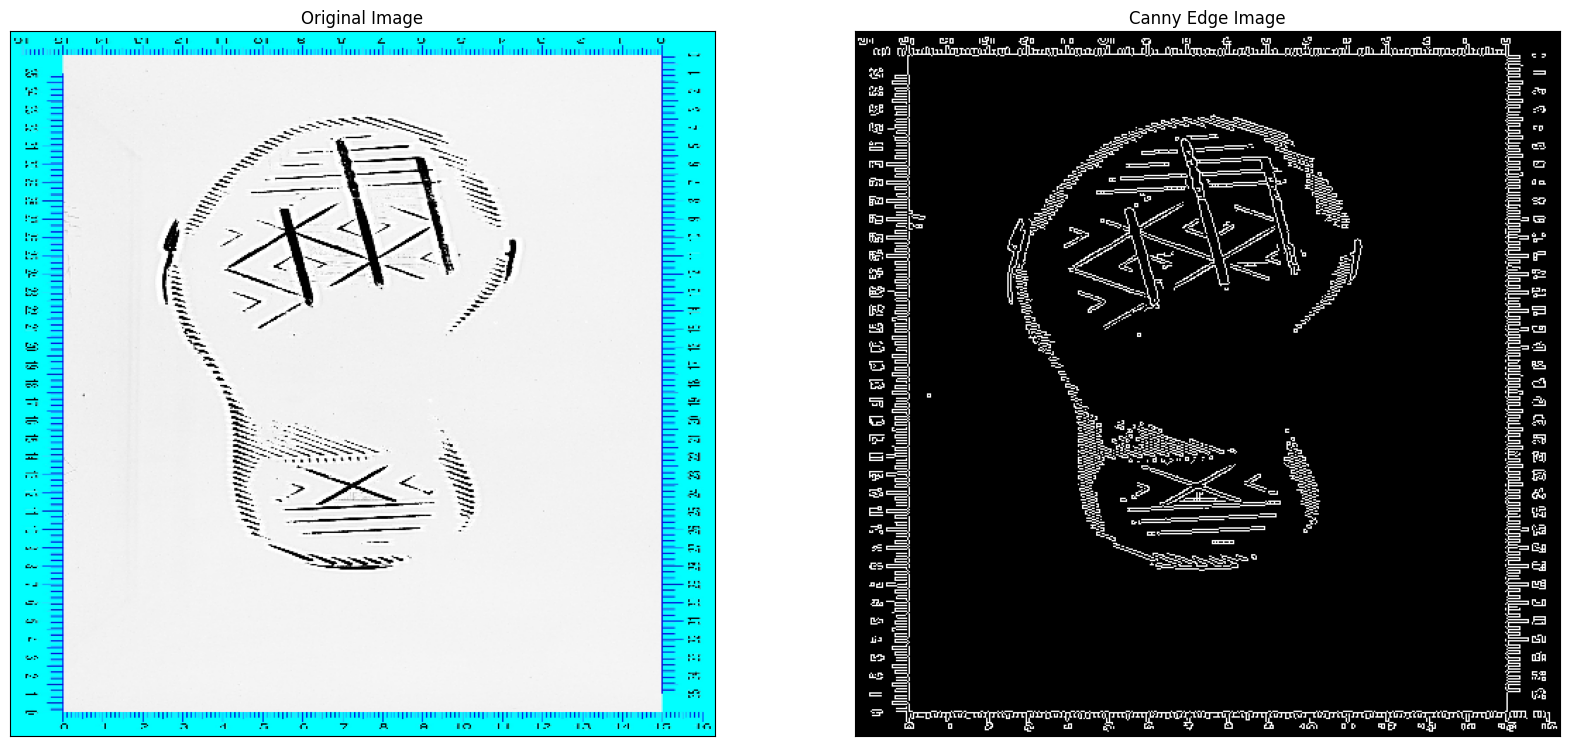

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import PIL


# Our footwear Image #1 that we will use for testing the Canny Algorithm
image = cv2.imread("/content/drive/MyDrive/Part1jpg/001_01_L_01.jpg")

# resize our images for a dimension

image_resized = cv2.resize(image,(500,500))



# Make our image recognizable by a feature like the discernable edges of the footwear image we want by edge tracking with hysterisis we want to suppress and our maxVal edge we can detect

edges = cv2.Canny(image_resized,60,400)
# Using matplot lib to make our plot and display the original resized image to the new image affected by the canny algorithm!
plt.figure(figsize=([20, 20]))

plt.subplot(121),plt.imshow(image_resized)
# Taking of our x and y axis and being able 
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image') , plt.xticks([]), plt.yticks([])

#cv2_imshow(image_resized)
#cv2_imshow(edges)


Not bad at all! Our minval and maxVal values were not bad in constituting what is an edge and what is not. Note that whenever there is a intensity gradient is that is less than our minVal in this case its 60 that edge will be discarded and if it falls above our maxVal which was 400 then it will automaatically considered a edge. If the edge value falls in between our threshholds then it will see if their are any potent long connections to called it a supposed edge through its connectivity.



<blockquote style="color:cadetblue";>
Now let's use the <b>automatic canny edge algorithm</b> that would take in account what should be the low(minVal) and high(maxVal)threshold using the median of the pixel intensities.
<blockquote style="color:cadetblue";>

(Text(0.5, 1.0, 'Automatic Canny Edge Image'), ([], []), ([], []))

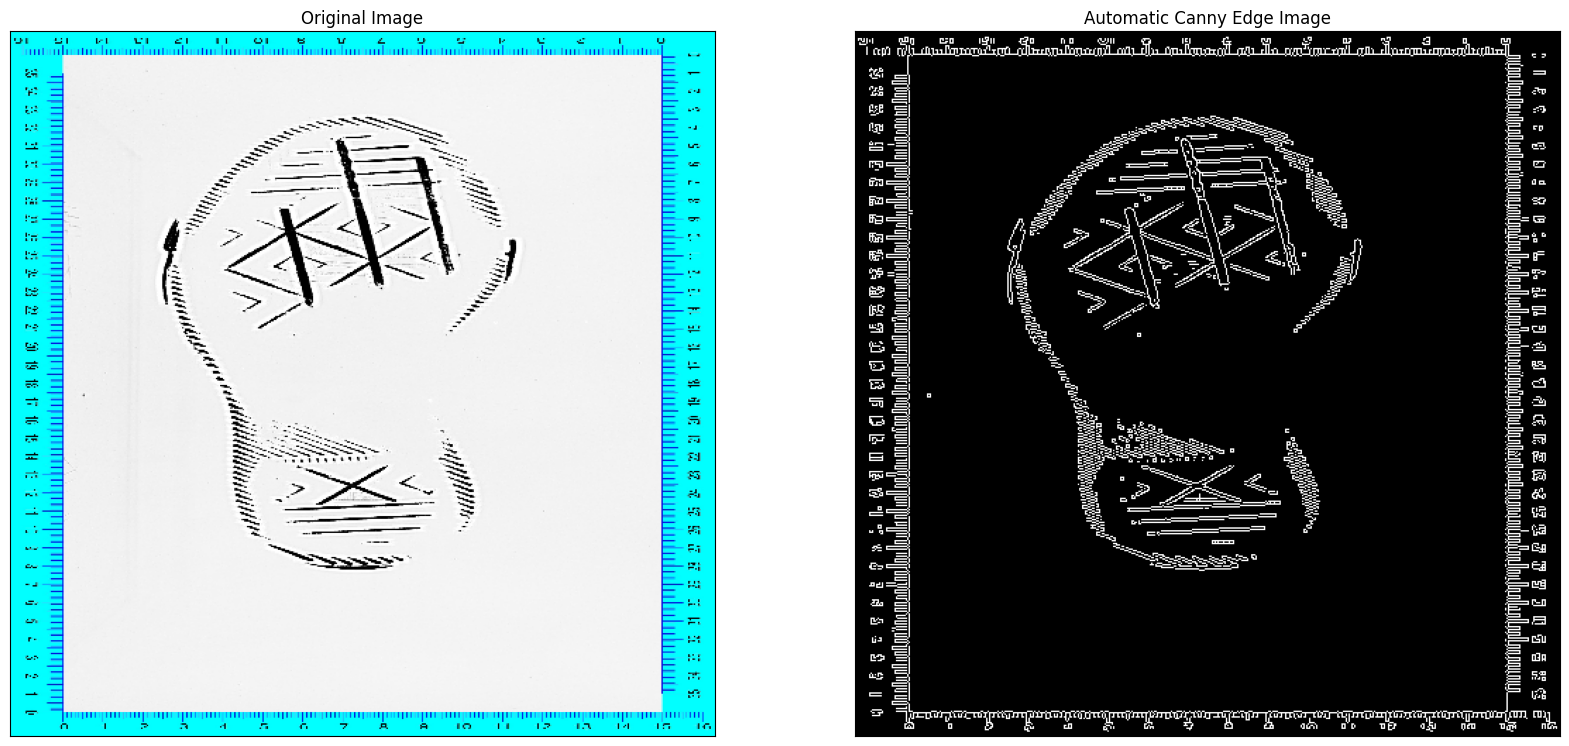

In [ ]:

####  Our automatic Canny Algorithm 


# Our footwear Image #1 that we are testing for the Canny Algorithm again
image = cv2.imread("/content/drive/MyDrive/Part1jpg/001_01_L_01.jpg")

# resize our images for a dimension easily seen in google collab

image_resized = cv2.resize(image,(500,500))




# AutoCanny Algorithm that finds the possible best fit of min and maxValues of edges using numpy median of each threshold

sigma = .33

median = np.median(image_resized)

minThreshold = int(max(0, (1.0 - sigma) * median))

upperThreshold = int(min(255, (1.0 + sigma) * median ))

auto_Canny = cv2.Canny(image_resized, minThreshold, upperThreshold)






# Make our image recognizable by a feature like the discernable edges of the footwear image we want by edge tracking with hysterisis we want to suppress and our maxVal edges we can detect

#edges = cv2.Canny(image_resized,60,400)
# Using matplot lib to make our plot and display the original resized image to the new image affected by the canny algorithm!




plt.figure(figsize=([20, 20]))

plt.subplot(121),plt.imshow(image_resized)
# Taking off our x and y axis and being able show this 
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# This is where we call auto_Canny to show 
plt.subplot(122), plt.imshow(auto_Canny,cmap = 'gray')
plt.title('Automatic Canny Edge Image') , plt.xticks([]), plt.yticks([])

#cv2_imshow(image_resized)
#cv2_imshow(edges)


<p><center> That is a lot better now lets see you try! Having seen the code now set your own edges on the same footprint image or even a new one from our dataset and see if you can make edges that arent too loose or noisy in a investigation and see if you capture mostly the strong edges that have high intensity and have a high sense of connectivity like the one above!</center></p>

<h4 style="color:darkolivegreen;"><center>[TODO Implement this algorithm with own your own min and maxVal threshold edges ]</center></h4> 

In [ ]:
#TODO Add a new set of edge descriptors using a resized image to fit into google collab changing the snippet edges = cv2.canny(image,minVal,maxVal)


<h4 style="color:darkolivegreen;"><center>[SIFT Scale Invariant Feature Transform]</center></h4>
<p><center>The SIFT algorithm will help with finding with the image processing in extracting an images keypoints and computing its necessary descriptors.</center></p>
<blockquote style="color:darkkhaki";>The sift algorithm is a very easy-to-use feature extraction technique that gets rid of a lot of redudant features. As the name suggests, SIFT finds these keypoints of an image, that are scale and rotation invariant, for our image processing.</blockquote>

<p><center>Link to the first proposal of this algorithm: <a href=
"https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf">[LINK]</a></center></p>


<p><center>There are four necessary points D.Lowe goes over in this algorithm</center></p>

<ol style=text-align:center;list-style-position:inside">
<li>Scale Space Extrema Detection : Make sure the features are scale independent this is utilized by different of gaussian function</li>

<li> Keypoint Localization : Need to identify any sustainable features or keypoints need to address there location and size</li>

<li>Orientation Assignment : Need to ensure our keypoints are rotation invariant that they make sense in respect to there size a 500x500 pixel image might be representative of 2000 features lets say</li>

<li>Keypoint Descriptor : Unique print into their keypoints and they transfomred into a representation from a keypoint level of significant points distortions</li>
</ol>




<h4 style="color:darkolivegreen;"><center>[One Image Footprint 1 with default descriptors from the SIFT algorithm]</center></h4> 

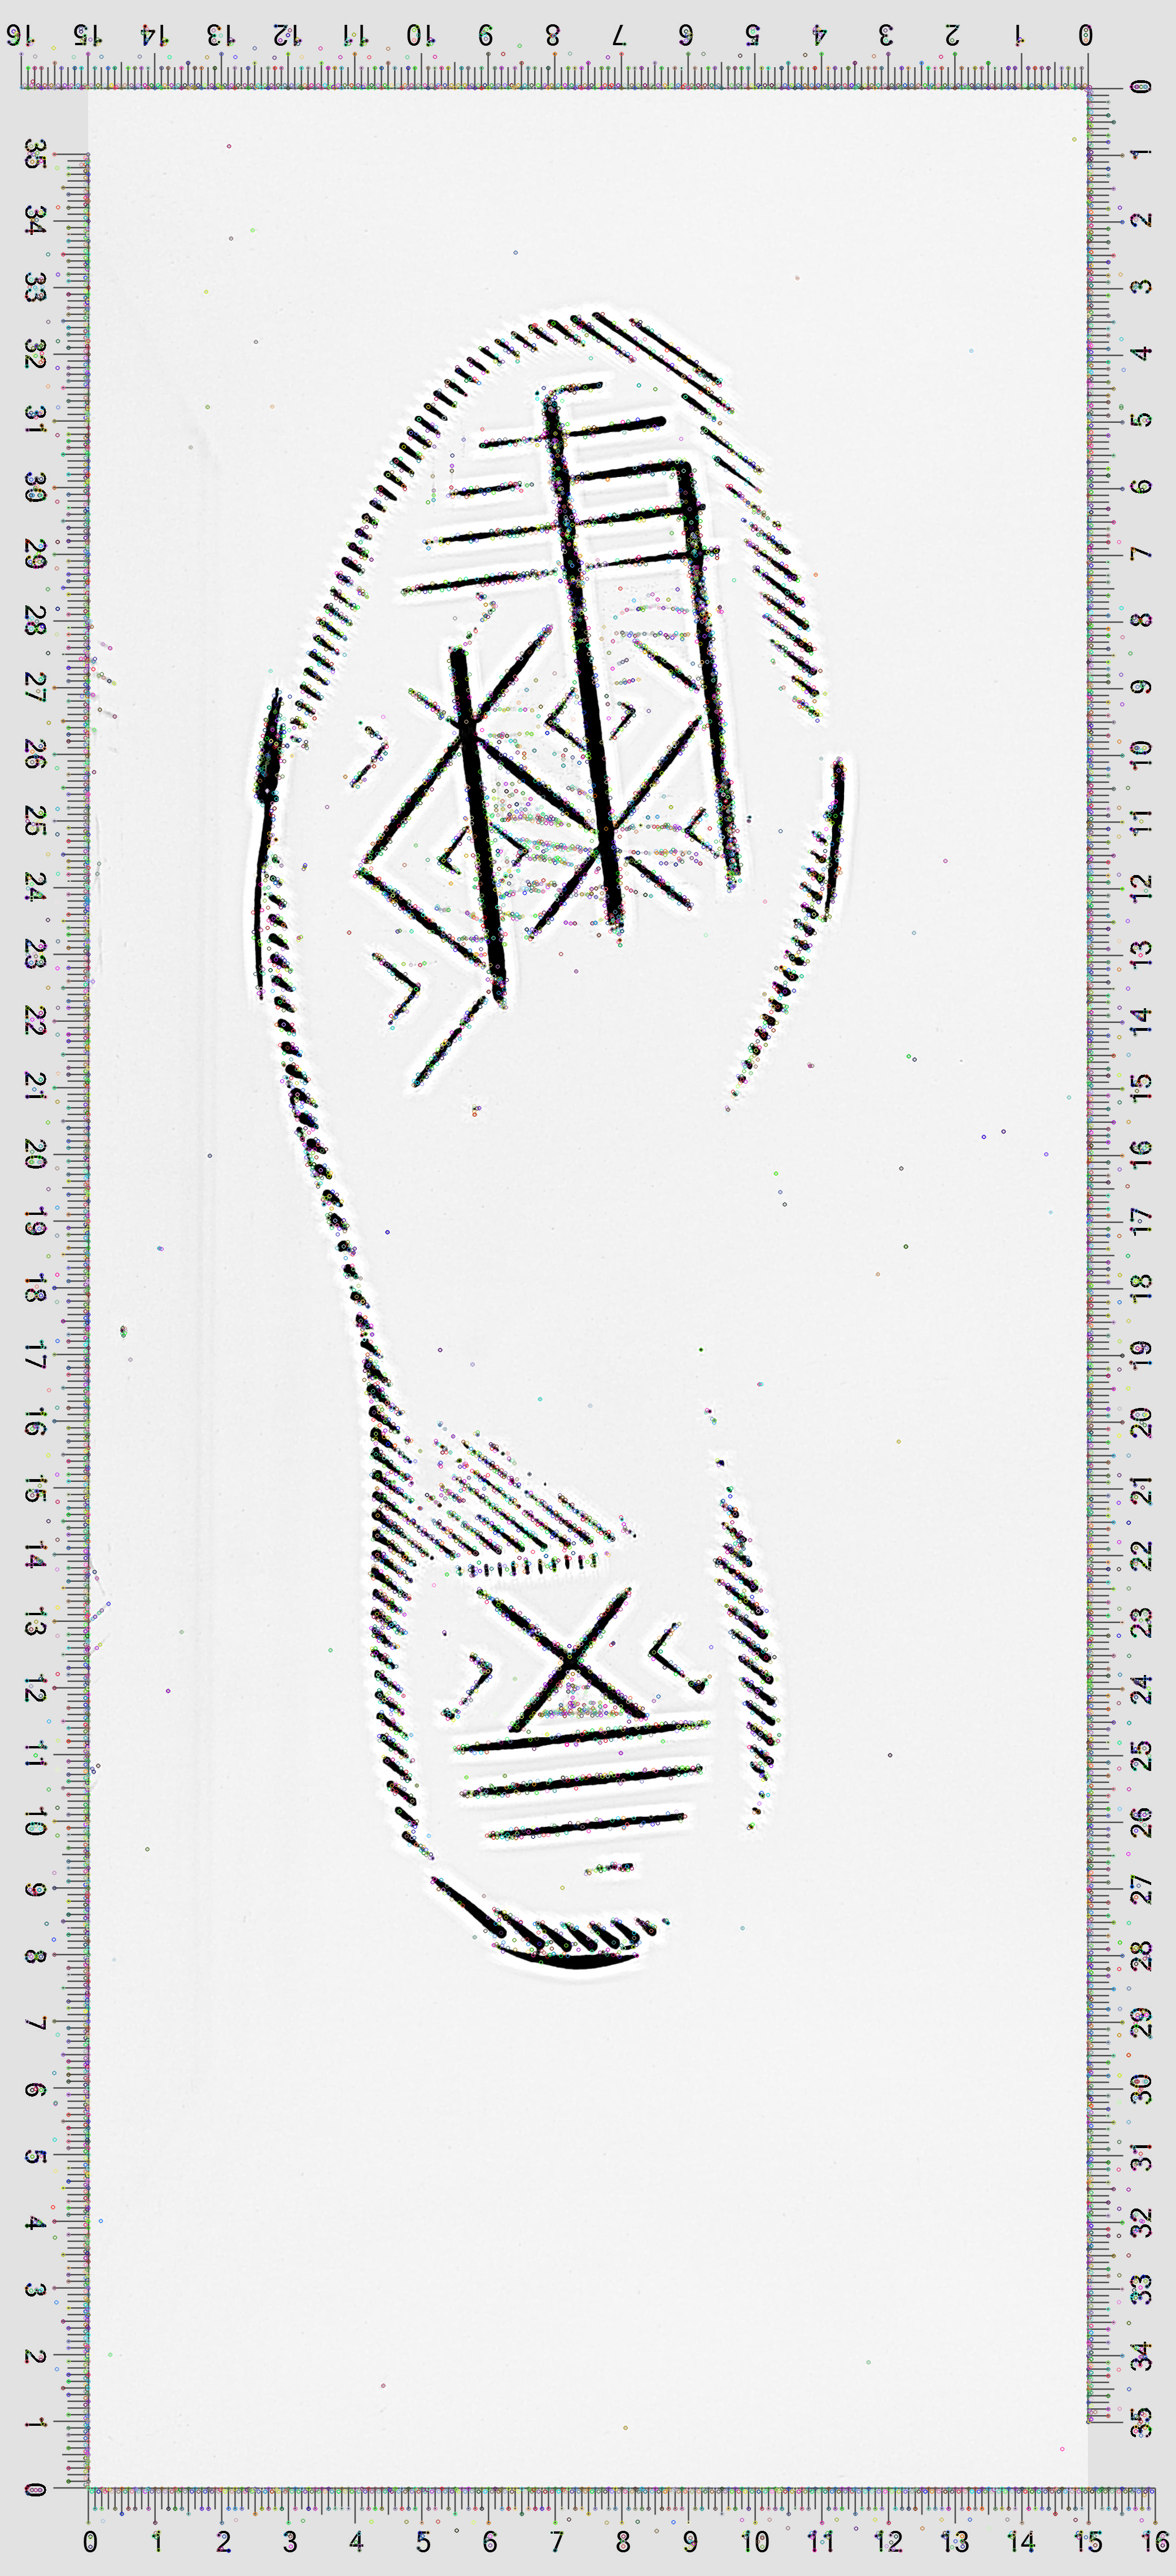

In [ ]:
# import required libraries
import cv2
from google.colab.patches import cv2_imshow
# read input image
img = cv2.imread('/content/drive/MyDrive/Part1jpg/001_01_L_01.jpg', cv2.IMREAD_GRAYSCALE)


# Initiating a SIFT object with default values
sift = cv2.SIFT_create()

# find the keypoints on image (grayscale)
kp = sift.detect(img,None)


# draw keypoints in image
img = cv2.drawKeypoints(img,kp, None, flags=0)   


# display the image with keypoints drawn on it
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<p><center><b>This algorithm is great to detect, describe, and match local features in images mostly.</b></center></p>

<p><center>One Image Footprint 1 with default descriptors from the SIFT algorithm</center></p>
<br>
<h4 style="color:darkolivegreen;"><center>[TODO Implement this algorithm with your own set of features]</center></h4> 

In [ ]:
#TODO Implement your code here with a footprint image given by the image footprint set
# import cv2_imread() etc utilize the features

<h2 style="color:indigo;"><center><u>[K-Means Clustering for Image processing]</u></center></h2>

<p><center> K-means algorithm’s goal is to group similar data points together into a predefined number of clusters. You can determine data points are similar by looking at how far apart they are. If two data points are closer, you can tell they are similar and if two data points are farther apart then it’s less similar. Once the distance between each data point and a centroid is calculated by you assigning it to a cluster..K-means involves centroids and makes use of them. Centroids means the cluster center. The number of centroids that are made correspond to the number of clusters that will be made.</center></p>
<blockquote style="cadetblue"> Centroid is a representation of the cluster's center.</blockquote>




<p><center> Now lets test out this unsupervised model by applying it to one of our images look with using a centroid k means of something like 3 so we will have 3 clusters </center></p>


<blockquote style="cadetblue"> Lets use our trusty image processing libraries like cv2 with our detailed input parameters </blockquote>

<dl style="text-align:center;list-style-position:inside">
    <dt><a href="https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html">[K-means cv2]</a></dt>


<blockquote style="cadetblue"> <dd style="color:cadetblue;">
</dd>   </blockquote>

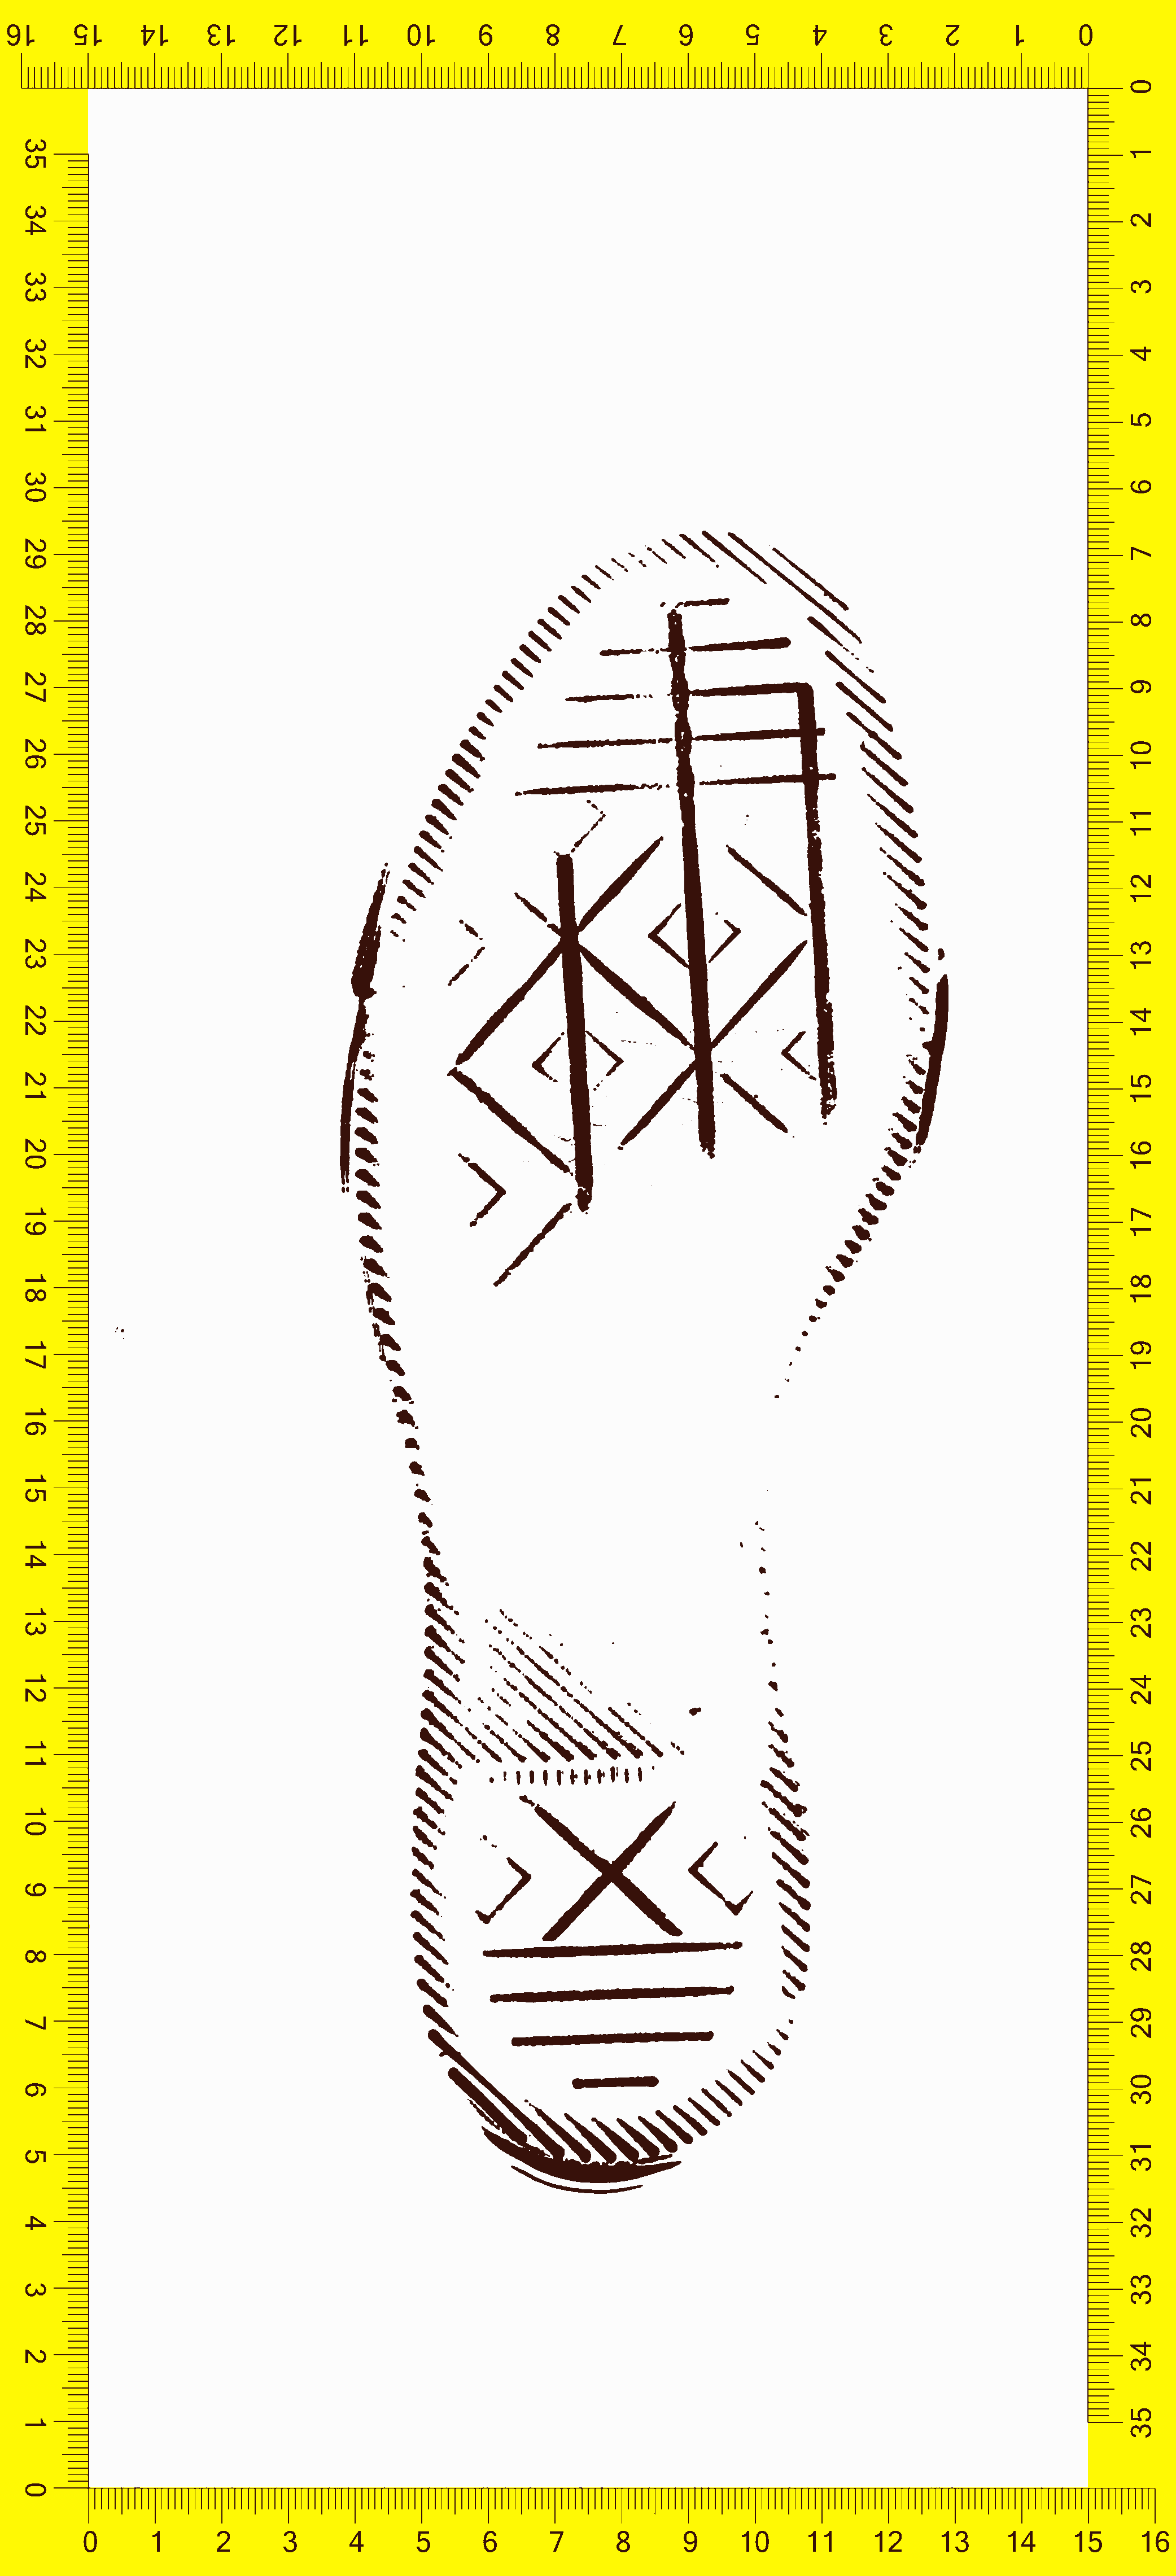

In [ ]:
import numpy as np

import cv2

img = cv2.imread("/content/drive/MyDrive/Part1jpg/001_01_L_02.jpg", 1)

#reshaping our images to be a different size array to enable k-means algorithm

image2 = img.reshape((-1,3))

image2 = np.float32(image2)

# define  our criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# our k-clusters that would consist of 3 clusters
K = 3

#the number of times the code will iterate to make our clusters with each initial label have more compactedness
runs = 10
ret,label,center=cv2.kmeans(image2,K,None,criteria,runs,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2 style="color:indigo;"><center><u>[Chapter 4: The advances in digital forgery and its countermeasures]</u></center></h2>

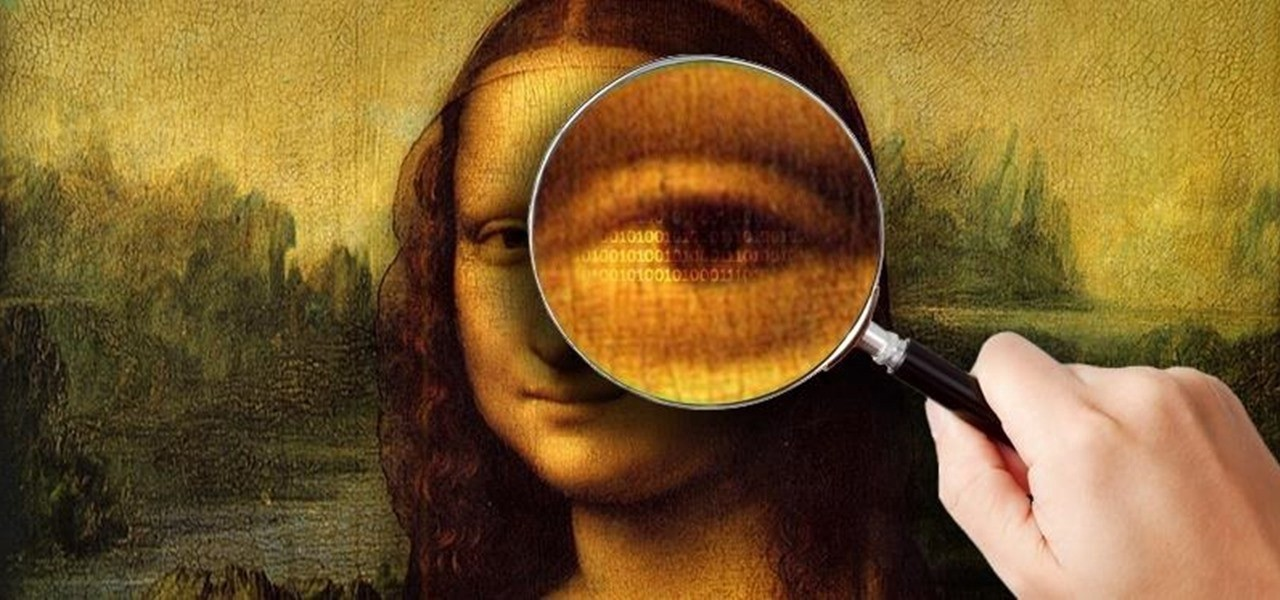

In [ ]:
## Dont run this cell already loaded image!
Image('steganography mona lisa.jpeg', width = 1000 , height = 600)


<p><center>In order to explore the the mind of a criminal, digital forensic scientists are often tasked with employing anti forensic-techniques to simulate criminal activity. One technique that we will be exploring is Steganography.</center></p>

<p><center><b>Steganography</b> is the process of hiding or concealing data in all sorts of mediums like text, data, and even images in order to avoid detection. Think of it like a method of creating and sneaking in a secret message, as if you were using an invisible ink pen.</center></p>

<blockquote style="color:mediumpurple";>Steganography is a vast field and there are plenty of ways to go about adding some sort of message onto a innocent looking image.</blockquote>

<p><center>We will be exploring one Steganography method which is called <b>least significant bit steganography</b>. Which is a simple and easy to implementation technique that will change the least significant bit of an image - creating some small alteration of an embedded image.</p></center>

<blockquote style="color:mediumpurple";>We will demonstrate this by an example of changing the bitmap index in one of our footprint images and giving you the run down analysis on how to decrypt an image of this sort as well.</blockquote>



<p><center><a href="https://www.nbcnews.com/id/wbna38028696">[Story premise]</a></center></p>



<h4 style="color:indigo;"><center><u>[Least Significant Bit Steganography]</u></center></h4>

<p><center>Here we head into some basic image forgery techniques that digital criminals of the tommorow could use. This one is known as Least Significant Bit Steganography</center></p>
<blockquote style="color:mediumpurple";> Any pixel we have in a numpy matrix is in the format of matrix[r,c] r being the row number and c being the columnn this needs to be fixed</blockquote>


In [ ]:

###Starting Least Bit Steganography###


#Reading in our image to cover this one is a footwear of participant 6 on the left shoe
img = cv2.imread("/content/drive/MyDrive/Part1jpg/006_03_L_03.jpg")


# Need to work with a single color channel in BGR fashion
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#Lets put a secret image inside our footprint and one that we could use is our google collab icon in Part1jpg.
secret_img = cv2.imread("/content/drive/MyDrive/Part1jpg/googlecollabicon.jpg")

# Our secret binary of the bits using numpy unpacking the bits
secret_binary = np.unpackbits(secret_img, axis=2)

# Extracting the LSBs from the cover image: Extract the least significant bits from the cover image using the bitwise AND operator (&) and the binary number 1.
lsb_img = gray_img & 1


#masking our new least significant bit image
np.putmask(lsb_img, secret_binary, lsb_img + 1)

cv2.imwrite('stegonopgrahpy_image.jpg', gray_img)





plt.subplot(121), plt.imshow(gray_img, cmap='gray')
plt.title('Cover Image') 
plt.subplot(122), plt.imshow(lsb_img, cmap='gray')
plt.title('Least Significant Bit Image')
plt.show()



ValueError: ignored

Least Significant bit Steganography  is not the strongest data hiding tools out there but helps us practice something called Steganalysis. In Digital Forensics Steganalysis is prominent in that it is the study of identifying suggested packages, determining  whether or not they have a payload attached to them and if possible recovering that payload through either statistical means or thru machine learning.

<h4 style="color:indigo;"><center><u>[Deep Fakes ]</u></center></h4>

<h2 style="color:darkcyan;"><center><u>[Later on, More Algorithms that we can use to process images]</u></center></h2>


<blockquote style="color:cadetblue";> In the case of processing images, APIs are very helpful, and they have a very important role for storing a tremendous number of images that need to be processed later through an algorithm such as segmentation, geometric transformations and K-means Algorithms.</blockquote>
 
<p><center>First, the segmentation algorithm is used for splitting an image into multiple layers by separating each layer so that it can be simplified for a better analysis</center></p>
 
<p><center>Second, geometric transformations are used for positioning and replacing shapes which sometimes helps in segmentation algorithms to provide a better analysis.</center></p>
 


<h2 style="color:darkcyan;"><center><u>[Apendix Table for Footprints Part1]</u></center></h2>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Part1jpg/Data-information.xlsx')

df 

ID Gender        Brand   Model/Details  Size
0    001_01      W     Converse             NaN   5.5
1    002_01      M      Saucony  cohesion_xt600   9.5
2    002_02      M      Saucony           ride5   9.5
3    002_05      M      Saucony        stratos4   9.5
4    002_06      M      Saucony         phantom   9.5
..      ...    ...          ...             ...   ...
145  026_10      W         Keen             NaN   7.5
146  026_11      W  Simply vera             NaN   7.5
147  026_12      W      Arizona             NaN   8.0
148  027_01      W         Nike             NaN  10.5
149  028_01      M        Asics             NaN  12.0

[150 rows x 5 columns]

This is a csv table that was given by Iowa State University that is very useful in learning about these outsole images and learning more about the dataset itself that we will cross reference a lot in describing a footwear image.
Note this only covers Part1 like we mentioned before with Participants in the Study of footwear soles from 1-7. 

Thanks for reading the image notebook and if you haven't already make sure to check out the chat log's book for more information about textual information and doing some data cleaning with tables like this!